In [ ]:
#My dataset is available in googledrive; so I am accessing my drive from colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
#Once this is executed, you will see your drive appearing on the left hand side

Mounted at /content/drive


In [6]:
# Define paths to the dataset
train_dir = '/content/drive/MyDrive/train'  # Update with your actual path
test_dir = '/content/drive/MyDrive/test'    # Update with your actual path

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [5]:
import os
print(len(os.listdir('/content/drive/MyDrive/train/not_pizza')))
print(len(os.listdir('/content/drive/MyDrive/train/pizza')))
print(len(os.listdir('/content/drive/MyDrive/test/not_pizza')))
print(len(os.listdir('/content/drive/MyDrive/test/pizza')))

800
800
183
183


In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification (pizza vs. not pizza)
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 1280 images belonging to 2 classes.
Found 320 images belonging to 2 classes.


In [8]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [9]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
#model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(64,activation='relu'))
#model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(1,activation='sigmoid'))  #output layer

In [10]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [11]:
history = model.fit(train_data, epochs=30, validation_data=validation_data)

Epoch 1/30
40/40 [==============================] - 375s 9s/step - loss: 0.7711 - accuracy: 0.5469 - val_loss: 0.6388 - val_accuracy: 0.6281
Epoch 2/30
40/40 [==============================] - 228s 6s/step - loss: 0.6074 - accuracy: 0.6766 - val_loss: 0.5846 - val_accuracy: 0.6875
Epoch 3/30
40/40 [==============================] - 221s 6s/step - loss: 0.5705 - accuracy: 0.6789 - val_loss: 0.5559 - val_accuracy: 0.7625
Epoch 4/30
40/40 [==============================] - 236s 6s/step - loss: 0.5023 - accuracy: 0.7570 - val_loss: 0.5385 - val_accuracy: 0.7406
Epoch 5/30
40/40 [==============================] - 231s 6s/step - loss: 0.4805 - accuracy: 0.7773 - val_loss: 0.5325 - val_accuracy: 0.7250
Epoch 6/30
40/40 [==============================] - 231s 6s/step - loss: 0.3819 - accuracy: 0.8250 - val_loss: 0.5597 - val_accuracy: 0.7656
Epoch 7/30
40/40 [==============================] - 226s 6s/step - loss: 0.3030 - accuracy: 0.8711 - val_loss: 0.5830 - val_accuracy: 0.7281
Epoch 8/30
40

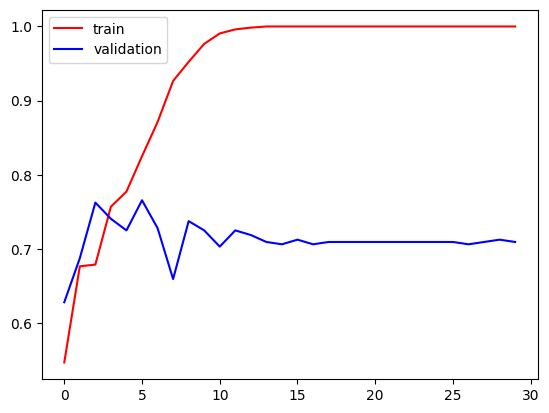

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

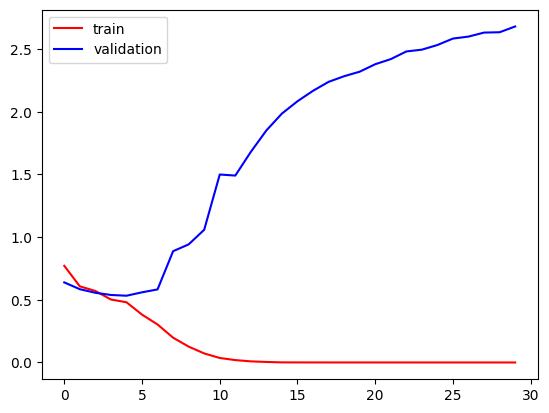

In [13]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [14]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 366 images belonging to 2 classes.


In [15]:
#predict the test data
predictions = model.predict(test_data)
print(predictions)

12/12 [==============================] - 43s 4s/step
[[9.64192867e-01]
 [1.73974531e-05]
 [8.72883499e-01]
 [4.95646477e-01]
 [1.49051396e-10]
 [9.99950588e-01]
 [9.97286290e-02]
 [2.67659798e-02]
 [9.99913514e-01]
 [7.84909498e-05]
 [2.01332290e-02]
 [9.62382615e-01]
 [3.59600596e-03]
 [6.19716346e-02]
 [9.47135627e-01]
 [1.20306481e-03]
 [2.36930404e-08]
 [9.99707699e-01]
 [1.25591150e-05]
 [9.95989859e-01]
 [6.02318868e-02]
 [1.08463724e-11]
 [1.00000000e+00]
 [1.35992179e-02]
 [9.99999821e-01]
 [1.47011814e-09]
 [1.00000000e+00]
 [9.99999881e-01]
 [6.10739371e-05]
 [7.83594549e-01]
 [9.35370624e-01]
 [2.80908704e-01]
 [9.99999940e-01]
 [1.37349248e-01]
 [9.98764098e-01]
 [9.60961916e-05]
 [1.57805085e-02]
 [1.94201832e-07]
 [9.97819126e-01]
 [9.99024272e-01]
 [9.98208761e-01]
 [9.99905944e-01]
 [8.90714765e-01]
 [2.33563478e-04]
 [4.07262474e-01]
 [9.99985158e-01]
 [9.99976575e-01]
 [9.97668862e-01]
 [1.39403599e-03]
 [3.02720871e-08]
 [9.99871016e-01]
 [1.36545841e-09]
 [9.9999690

In [16]:
len(predictions)

366

In [17]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[90 93]
 [96 87]]
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.49      0.49       183
           1       0.48      0.48      0.48       183

    accuracy                           0.48       366
   macro avg       0.48      0.48      0.48       366
weighted avg       0.48      0.48      0.48       366

